[Overfitting, Overparameterization, and Double-Descent.py](Overparameterization_dd.py) file.

In [1]:
%load_ext autoreload
%autoreload 2
from Overparameterization_dd import LinearModel, MyLinearRegression, OverParameterizedLinearRegressionOptimizer

# Abstract

This post explores the behavior of overparameterized linear regression models by investigating the double descent phenomenon using random feature transformations. We examine how training and test errors evolve as the number of features increases. By applying a nonlinear random feature mapping (with a square activation) and computing optimal weights that interpolate the training data, we visualize the resulting error trends. Our results confirm the presence of the double descent curve: training error decreases monotonically with more features, while test error initially decreases, peaks around the interpolation threshold, and then decreases again. These findings illustrate how increasing model capacity beyond the interpolation point can paradoxically improve generalization.

Starter code from assignment:


In [2]:
import torch

def sig(x): 
    return 1/(1+torch.exp(-x))

def square(x): 
    return x**2

class RandomFeatures:
    """
    Random sigmoidal feature map. This feature map must be "fit" before use, like this: 

    phi = RandomFeatures(n_features = 10)
    phi.fit(X_train)
    X_train_phi = phi.transform(X_train)
    X_test_phi = phi.transform(X_test)

    model.fit(X_train_phi, y_train)
    model.score(X_test_phi, y_test)

    It is important to fit the feature map once on the training set and zero times on the test set. 
    """

    def __init__(self, n_features, activation = sig):
        self.n_features = n_features
        self.u = None
        self.b = None
        self.activation = activation

    def fit(self, X):
        self.u = torch.randn((X.size()[1], self.n_features), dtype = torch.float64)
        self.b = torch.rand((self.n_features), dtype = torch.float64) 

    def transform(self, X):
        return self.activation(X @ self.u + self.b)

# Part 0

In Equation 1, (X^T )^-1 can only exist is (X^T) invertible. And this can only happen when the number of data points (n) is greater than or equal to the number of features (p). 
So if we try to calculate this result, we would end up with an underfined value for the inverse calculation which means the solution for the closed form calculation does not exist. 

# Part A

I implemented the MyLinearRegression class with the requested functions: predict, loss.

The OverParameterizedLinearRegressionOptimizer class computes the optimal weights for the linear regression model using the given Moore-Penrose pseudoinverse calculation technique.

# Part B

Fitting ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍model ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍some ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍1-d ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data:

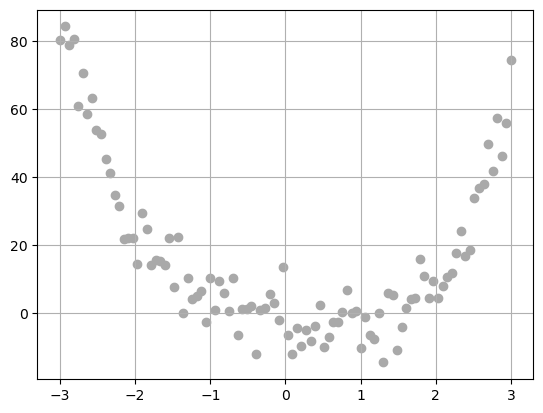

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = torch.tensor(np.linspace(-3, 3, 100).reshape(-1, 1), dtype = torch.float64)
y = X**4 - 4*X + torch.normal(0, 5, size=X.shape)

plt.scatter(X, y, color='darkgrey', label='Data')
plt.grid()

Using ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍RandomFeatures ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍class ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍generate ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍set ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍features ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍which is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍then ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍feed ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍into ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍MyLinearRegression ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍model. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍We then ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍plot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍model ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍predictions ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍alongside ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data: ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍

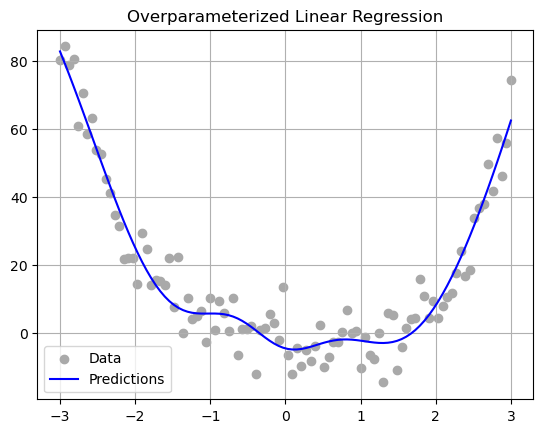

In [4]:
phi = RandomFeatures(n_features=8)
phi.fit(X)
X_random = phi.transform(X)

model = MyLinearRegression()
opt = OverParameterizedLinearRegressionOptimizer(model)

opt.fit(X_random, y)

y_pred = model.predict(X_random)

plt.scatter(X, y, color='darkgrey', label='Data')
plt.plot(X, y_pred, color='blue', label='Predictions')
plt.title('Overparameterized Linear Regression')
plt.grid()
plt.legend()
plt.show()

# Part C: Double Descent In Image Corruption Detection
Most of the following code was provided.

Now ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍you’ll ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍apply ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍your ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍model ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍more ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍complicated ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍set. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Here’s ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍our ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍scenario: ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍have ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍following ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍greyscale ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍beautiful ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍flower:

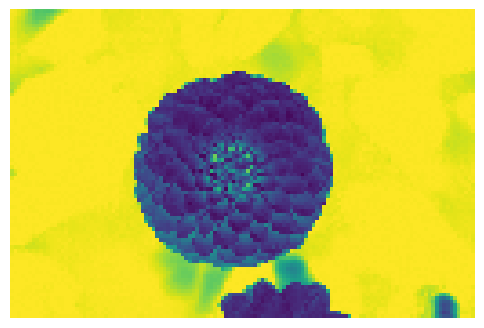

In [5]:
from sklearn.datasets import load_sample_images
from scipy.ndimage import zoom

dataset = load_sample_images()     
X = dataset.images[1]
X = zoom(X,.2) #decimate resolution
X = X.sum(axis = 2)
X = X.max() - X 
X = X / X.max()
flower = torch.tensor(X, dtype = torch.float64)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(flower)
off = ax.axis("off")

However, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍this ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍has ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍some ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍variable ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍amount ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍corruption ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍represented ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍contiguous ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍blocks ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍grey ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍pixels, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍which ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍implemented ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍following ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍This ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍adds ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍random ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍randomly-sized ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍grey ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍patches ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍also ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍returns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍patches ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍added.



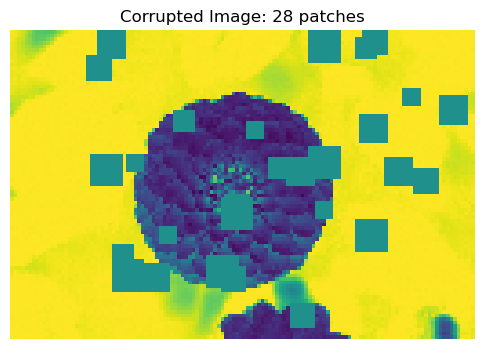

In [6]:
def corrupted_image(im, mean_patches = 5): 
    n_pixels = im.size()
    num_pixels_to_corrupt = torch.round(mean_patches*torch.rand(1))
    num_added = 0

    X = im.clone()

    for _ in torch.arange(num_pixels_to_corrupt.item()): 
        
        try: 
            x = torch.randint(0, n_pixels[0], (2,))

            x = torch.randint(0, n_pixels[0], (1,))
            y = torch.randint(0, n_pixels[1], (1,))

            s = torch.randint(5, 10, (1,))
            
            patch = torch.zeros((s.item(), s.item()), dtype = torch.float64) + 0.5

            # place patch in base image X
            X[x:x+s.item(), y:y+s.item()] = patch
            num_added += 1

            
        except: 
            pass

    return X, num_added

X, y = corrupted_image(flower, mean_patches = 50)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(X.numpy(), vmin = 0, vmax = 1)
ax.set(title = f"Corrupted Image: {y} patches")
off = plt.gca().axis("off")

Our ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍regression ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍task ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍predict ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍corruptions ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍in ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍just ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍from ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍itself. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍To ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍do ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍this, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we’ll ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍generate ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍set ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍corrupted ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍images.

In [7]:
n_samples = 200

X = torch.zeros((n_samples, flower.size()[0], flower.size()[1]), dtype = torch.float64)
y = torch.zeros(n_samples, dtype = torch.float64)
for i in range(n_samples): 
    X[i], y[i] = corrupted_image(flower, mean_patches = 100)

Now ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we’ll ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍reshape ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍image ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍(laying ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍its ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍pixels ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍out ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍it ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍one ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍long ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍row) ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍split ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍into ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍training ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍test ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍sets.

In [8]:
from sklearn.model_selection import train_test_split

X = X.reshape(n_samples, -1)
# X.reshape(n_samples, -1).size()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

The following code tries to understand the behavior of an overparameterized linear regression model using random feature transformations and visualizes the double descent phenomenon in both training and test error. We loop over a range of features up to 200. For each number of features, we apply a RandomFeatures transformation (with a square activation) to the training and testing data. We then compute the optimal weights that interpolate the training data. After training the model, the code calculates the mean squared error (MSE) on both the training and testing sets using the loss function and stores these values.

Finally, we plot the training and test MSE side by side on a log-scaled y-axis. A vertical line is drawn at the interpolation threshold to highlight this transition point. These visualizations help illustrate how the training error decreases steadily with more features, while the test error first decreases, spikes around the interpolation threshold, and then decreases again—demonstrating the classic double descent curve observed in overparameterized models.

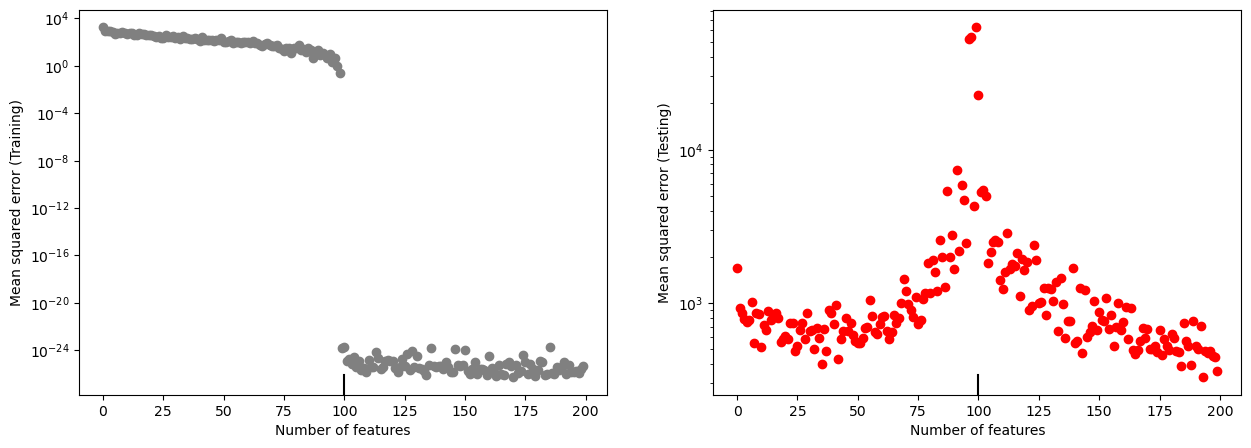

In [9]:
n_range = list(range(1, 201))
train_errors = []
test_errors = []

for n_features in n_range:
    phi = RandomFeatures(n_features=n_features, activation=square)
    phi.fit(X_train)
    X_train_random = phi.transform(X_train)
    X_test_random = phi.transform(X_test)

    model = MyLinearRegression()
    opt = OverParameterizedLinearRegressionOptimizer(model)
    opt.fit(X_train_random, y_train)

    train_errors.append(model.loss(X_train_random, y_train))
    test_errors.append(model.loss(X_test_random, y_test))

interpolation_threshold = X_train.size(0)

# Plotting the two graphs side by side with 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(range(200), train_errors, color='grey')
axs[0].set_yscale('log')
axs[0].axvline(x = interpolation_threshold, color = 'black', ymax=0.05)
axs[0].set_xlabel("Number of features")
axs[0].set_ylabel("Mean squared error (Training)")

axs[1].scatter(range(200), test_errors, color='red')
axs[1].set_yscale('log')
axs[1].axvline(x = interpolation_threshold, color = 'black', ymax=0.05)
axs[1].set_xlabel("Number of features")
axs[1].set_ylabel("Mean squared error (Testing)")

plt.show()


As expected we observe the double descent phenomenon. 

The ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍features ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍at ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍which I ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍achieved ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍best ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍testing ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍error was around 195 with the lowest mean squared error value. This optimal number is above the interpolation threshold. 

Traditionally, by increasing model complexity through increasing number of features, we expect to cause overfitting and thus higher test error. However, this phenonmenon of double descent we have just observed shows that after the peak in test error at the interpolation threshold, further increasing the number of features (with risk of over-parameterization) we actually observe a second decrease in test error, sometimes achieving even lower error than at the classical "sweet spot" of the bias-variance curve.



# Discussion

Through this analysis, we observed a clear instance of the double descent phenomenon in a linear regression setting enhanced by random nonlinear features. Contrary to the classical bias-variance tradeoff intuition, test error did not simply worsen with increasing model complexity. Instead, it peaked near the interpolation threshold and then improved, with the best performance occurring at a feature count well beyond this point. This challenges the traditional assumption that overparameterization necessarily leads to worse generalization. Completing this post deepened my understanding of modern generalization behavior in machine learning and showed that we can sometimes improve model performance by pushing past conventional limits. It helped me realize that, with the right feature transformations, we can go beyond the apparent ceiling imposed by overfitting and build models that perform surprisingly well—even though it is highly overparameterized.